Image Matrix: 
(480, 640)
uint8


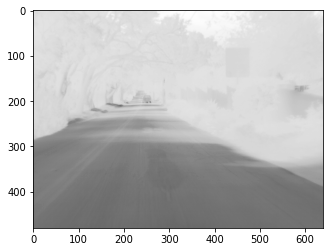

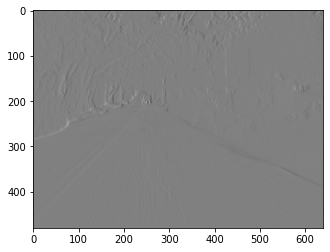

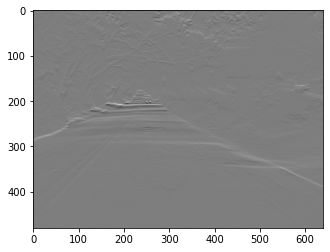

In [10]:
from PIL import Image
import numpy as np
import cv2
import matplotlib.pyplot as plt

path = f'data/Thermal_train_HR/1064.png'
image = Image.open(path)
img = np.array(image)
print("Image Matrix: ")
# print(img)
print(img.shape)
print(img.dtype)
plt.imshow(img,cmap='Greys')
plt.show()

# Sobel
sobelx = cv2.Sobel(img,cv2.CV_64F,1,0,ksize=3)
sobely = cv2.Sobel(img,cv2.CV_64F,0,1,ksize=3)
plt.imshow(sobelx,cmap = 'gray')
plt.show()
plt.imshow(sobely,cmap = 'gray')
plt.show()


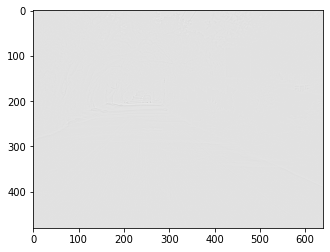

In [11]:

# Laplacian
laplacian = cv2.Laplacian(img,cv2.CV_64FC1)
plt.imshow(laplacian,cmap = 'gray')
plt.show()


In [12]:
def kirsch_filter(gray):
    if gray.ndim > 2:
        raise Exception("illegal argument: input must be a single channel image (gray)")
    kernelG1 = np.array([[ 5,  5,  5],
                         [-3,  0, -3],
                         [-3, -3, -3]], dtype=np.float32)
    kernelG2 = np.array([[ 5,  5, -3],
                         [ 5,  0, -3],
                         [-3, -3, -3]], dtype=np.float32)
    kernelG3 = np.array([[ 5, -3, -3],
                         [ 5,  0, -3],
                         [ 5, -3, -3]], dtype=np.float32)
    kernelG4 = np.array([[-3, -3, -3],
                         [ 5,  0, -3],
                         [ 5,  5, -3]], dtype=np.float32)
    kernelG5 = np.array([[-3, -3, -3],
                         [-3,  0, -3],
                         [ 5,  5,  5]], dtype=np.float32)
    kernelG6 = np.array([[-3, -3, -3],
                         [-3,  0,  5],
                         [-3,  5,  5]], dtype=np.float32)
    kernelG7 = np.array([[-3, -3,  5],
                         [-3,  0,  5],
                         [-3, -3,  5]], dtype=np.float32)
    kernelG8 = np.array([[-3,  5,  5],
                         [-3,  0,  5],
                         [-3, -3, -3]], dtype=np.float32)

#     g1 = cv2.normalize(cv2.filter2D(gray, cv2.CV_32F, kernelG1), None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8UC1)
#     g2 = cv2.normalize(cv2.filter2D(gray, cv2.CV_32F, kernelG2), None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8UC1)
#     g3 = cv2.normalize(cv2.filter2D(gray, cv2.CV_32F, kernelG3), None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8UC1)
#     g4 = cv2.normalize(cv2.filter2D(gray, cv2.CV_32F, kernelG4), None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8UC1)
#     g5 = cv2.normalize(cv2.filter2D(gray, cv2.CV_32F, kernelG5), None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8UC1)
#     g6 = cv2.normalize(cv2.filter2D(gray, cv2.CV_32F, kernelG6), None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8UC1)
#     g7 = cv2.normalize(cv2.filter2D(gray, cv2.CV_32F, kernelG7), None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8UC1)
#     g8 = cv2.normalize(cv2.filter2D(gray, cv2.CV_32F, kernelG8), None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8UC1)
    g1 = cv2.filter2D(gray, cv2.CV_32F, kernelG1)
    g2 = cv2.filter2D(gray, cv2.CV_32F, kernelG2)
    g3 = cv2.filter2D(gray, cv2.CV_32F, kernelG3)
    g4 = cv2.filter2D(gray, cv2.CV_32F, kernelG4)
    g5 = cv2.filter2D(gray, cv2.CV_32F, kernelG5)
    g6 = cv2.filter2D(gray, cv2.CV_32F, kernelG6)
    g7 = cv2.filter2D(gray, cv2.CV_32F, kernelG7)
    g8 = cv2.filter2D(gray, cv2.CV_32F, kernelG8)
    magn = cv2.max(
        g1, cv2.max(
            g2, cv2.max(
                g3, cv2.max(
                    g4, cv2.max(
                        g5, cv2.max(
                            g6, cv2.max(
                                g7, g8
                            )
                        )
                    )
                )
            )
        )
    )
    return magn

uint8
[[ 92  93  92 ...  74  73  72]
 [ 90  91  91 ...  76  75  72]
 [ 90  90  91 ...  74  71  70]
 ...
 [175 175 177 ... 176 176 176]
 [175 175 176 ... 177 176 176]
 [175 176 176 ... 177 176 176]]
float32
[[10.  8.  4. ... 13. 32. 14.]
 [34. 29. 12. ... 24. 46. 20.]
 [13. 18. 19. ... 61. 81. 69.]
 ...
 [15. 14.  6. ...  7. 12. 10.]
 [10. 17.  8. ...  5. 10.  0.]
 [ 2. 15. 11. ...  5. 15.  0.]]


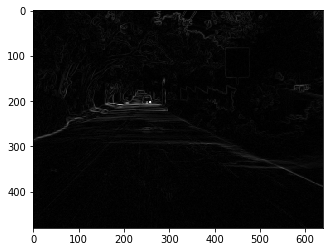

In [13]:
bin = kirsch_filter(img)
print(img.dtype)
print(img)
print(bin.dtype)
print(bin)
# show results 
plt.imshow(bin, interpolation='none', cmap='gray')
plt.show()